In [162]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup

### All-Star Snubs

Compare top 20 players by advanced metrics vs. actual all-star selections.

Use VI (Value Index) or P+R+A (Points + Rebounds + Assists) as criteria.

In [164]:

# URL to scrape
url1 = "https://www.nbastuffer.com/2024-2025-nba-player-stats/"
url2 = "https://www.nbastuffer.com/2023-2024-nba-player-stats/"

def scrape_nba_table(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.find("table")
    df = pd.read_html(str(table))[0]
    return df


nba_2024_2025_df = scrape_nba_table(url1)
nba_2023_2024_df = scrape_nba_table(url2)

/var/folders/70/58_fmkvx1rv29ckl5tw1vyb00000gn/T/ipykernel_91788/2108250269.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/var/folders/70/58_fmkvx1rv29ckl5tw1vyb00000gn/T/ipykernel_91788/2108250269.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [165]:
nba_2024_2025_df.head()

,RANK,NAME,TEAM,CUR,POS,AGE,GP,MpG,USG%,TO%,...,ApG,SpG,BpG,TOpG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,LeBron James,Lal,*,F,40.3,67,35.1,30.1,17.1,...,8.4,1.0,0.6,3.7,32.4,32.9,40.7,13.4,116.8,112.0
1,NaN,Chris Paul,San,*,G,39.9,78,28.1,13.8,18.0,...,7.6,1.3,0.3,1.6,12.4,16.4,20.0,8.9,126.3,114.1
2,NaN,Kyle Lowry,Phi,*,G,39.0,34,18.8,10.1,15.7,...,2.8,1.0,0.3,0.6,5.9,6.7,8.6,5.8,118.9,112.3
3,NaN,Kevin Durant,Pho,*,F,36.5,62,36.5,28.7,14.5,...,4.2,0.8,1.2,3.1,32.6,30.8,36.8,9.6,117.0,117.9
4,NaN,Al Horford,Bos,*,C-F,38.8,59,27.6,13.7,8.9,...,2.2,0.6,0.8,0.7,15.0,11.1,17.1,7.1,121.0,109.3


In [167]:
nba_2023_2024_df.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,LeBron James,Lal,F,39.5,5,40.8,29.0,16.1,23,...,8.8,2.4,1.0,3.8,34.6,36.6,43.4,11.6,118.5,110.4
1,NaN,P.J. Tucker,Lac,F,39.1,2,15.3,13.4,33.3,0,...,0.0,0.0,0.0,1.5,7.0,5.5,7.0,0.0,114.5,103.6
2,NaN,Kevin Durant,Pho,F,35.7,4,42.1,25.6,12.9,34,...,3.3,0.5,1.5,2.5,33.3,30.0,36.5,7.9,122.6,114.5
3,NaN,Al Horford,Bos,C-F,38.0,19,30.3,12.5,8.0,11,...,2.1,0.8,0.8,0.6,16.2,11.3,18.3,6.8,130.0,108.6
4,NaN,Mike Conley,Min,G,36.7,15,31.6,17.0,12.1,28,...,5.7,1.4,0.2,1.3,15.5,17.3,21.2,8.1,119.6,104.9


In [168]:
nba_2023_2024_df = nba_2023_2024_df.drop(nba_2023_2024_df.columns[[0]], axis=1)
nba_2023_2024_df.head()

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,LeBron James,Lal,F,39.5,5,40.8,29.0,16.1,23,0.739,...,8.8,2.4,1.0,3.8,34.6,36.6,43.4,11.6,118.5,110.4
1,P.J. Tucker,Lac,F,39.1,2,15.3,13.4,33.3,0,0.000,...,0.0,0.0,0.0,1.5,7.0,5.5,7.0,0.0,114.5,103.6
2,Kevin Durant,Pho,F,35.7,4,42.1,25.6,12.9,34,0.824,...,3.3,0.5,1.5,2.5,33.3,30.0,36.5,7.9,122.6,114.5
3,Al Horford,Bos,C-F,38.0,19,30.3,12.5,8.0,11,0.636,...,2.1,0.8,0.8,0.6,16.2,11.3,18.3,6.8,130.0,108.6
4,Mike Conley,Min,G,36.7,15,31.6,17.0,12.1,28,0.714,...,5.7,1.4,0.2,1.3,15.5,17.3,21.2,8.1,119.6,104.9


In [169]:
nba_23_24_team_avg = nba_2024_2025_df.drop(nba_2023_2024_df.columns[[0]], axis=1)
nba_23_24_team_avg.head()

,RANK,TEAM,CUR,POS,AGE,GP,MpG,USG%,TO%,FTA,...,ApG,SpG,BpG,TOpG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,Lal,*,F,40.3,67,35.1,30.1,17.1,314,...,8.4,1.0,0.6,3.7,32.4,32.9,40.7,13.4,116.8,112.0
1,NaN,San,*,G,39.9,78,28.1,13.8,18.0,87,...,7.6,1.3,0.3,1.6,12.4,16.4,20.0,8.9,126.3,114.1
2,NaN,Phi,*,G,39.0,34,18.8,10.1,15.7,33,...,2.8,1.0,0.3,0.6,5.9,6.7,8.6,5.8,118.9,112.3
3,NaN,Pho,*,F,36.5,62,36.5,28.7,14.5,361,...,4.2,0.8,1.2,3.1,32.6,30.8,36.8,9.6,117.0,117.9
4,NaN,Bos,*,C-F,38.8,59,27.6,13.7,8.9,38,...,2.2,0.6,0.8,0.7,15.0,11.1,17.1,7.1,121.0,109.3


In [170]:
nba_24_25_team_avg = nba_2024_2025_df.groupby('TEAM').mean(numeric_only=True).round(2)
nba_24_25_team_avg.head()

,RANK,AGE,GP,MpG,USG%,TO%,FTA,FT%,2PA,2P%,...,ApG,SpG,BpG,TOpG,P+R,P+A,P+R+A,VI,ORtg,DRtg
TEAM,,,,,,,,,,,,,,,,,,,,,
Atl,NaN,26.30,38.35,21.98,18.22,11.92,90.55,0.77,212.25,0.57,...,2.38,0.82,0.46,1.22,14.54,12.95,16.92,7.24,117.81,111.31
Bos,NaN,27.84,45.61,18.31,16.15,12.22,83.83,0.74,181.00,0.53,...,1.85,0.55,0.44,0.84,12.02,10.32,13.86,6.80,111.45,106.78
Bro,NaN,24.85,33.21,21.58,20.06,13.18,67.00,0.71,152.46,0.47,...,2.48,0.69,0.36,1.27,12.81,11.85,15.26,6.77,99.62,101.72
Cha,NaN,26.21,30.67,21.03,19.24,16.92,57.56,0.73,147.26,0.45,...,2.32,0.73,0.40,1.41,12.52,11.12,14.84,7.48,101.96,107.27
Chi,NaN,25.91,39.59,17.90,18.02,10.55,70.14,0.74,176.73,0.55,...,2.15,0.56,0.30,0.95,11.87,10.75,14.04,7.75,107.59,101.24


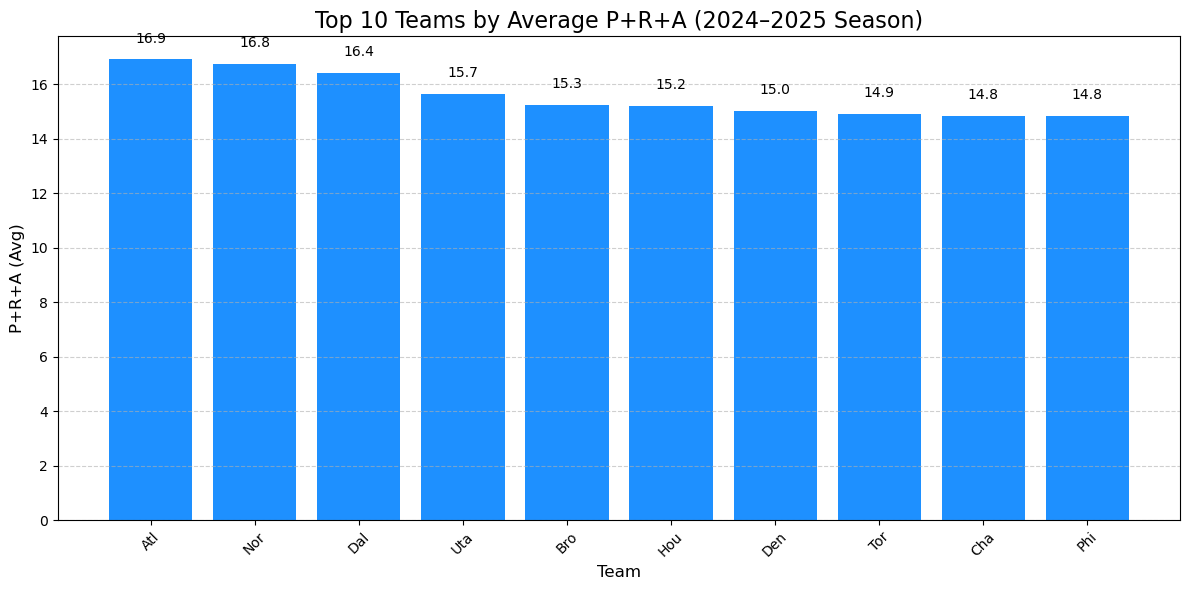

In [174]:
nba_24_25_team_avg = nba_24_25_team_avg.drop(nba_24_25_team_avg.columns[0], axis=1)
nba_23_24_team_avg = nba_23_24_team_avg.drop(nba_24_25_team_avg.columns[0], axis=1)


top10_pra_24_25 = nba_24_25_team_avg.sort_values("P+R+A", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top10_pra_24_25.index, top10_pra_24_25["P+R+A"], color='dodgerblue')

# Annotate each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.1f}", ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Teams by Average P+R+A (2024–2025 Season)", fontsize=16)
plt.xlabel("Team", fontsize=12)
plt.ylabel("P+R+A (Avg)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

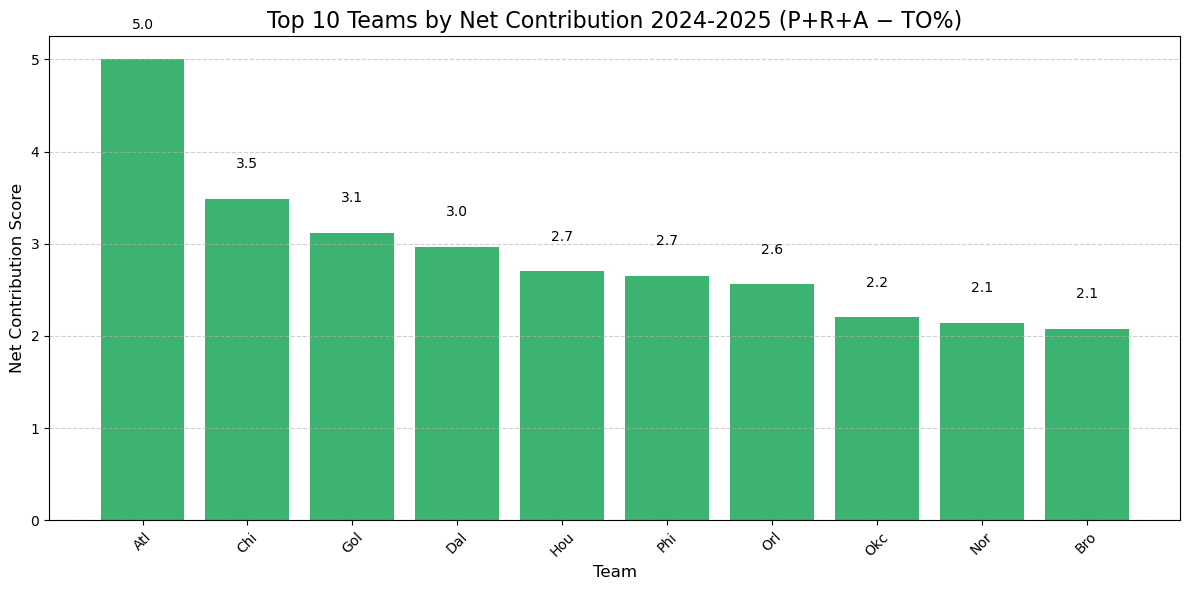

In [195]:
#2024-2025
nba_24_25_team_avg["Net_Contribution"] = nba_24_25_team_avg["P+R+A"] - nba_24_25_team_avg["TO%"]

top10_net = nba_24_25_team_avg.sort_values("Net_Contribution", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top10_net.index, top10_net["Net_Contribution"], color='mediumseagreen')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f"{yval:.1f}", ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Teams by Net Contribution 2024-2025 (P+R+A − TO%)", fontsize=16)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Net Contribution Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()





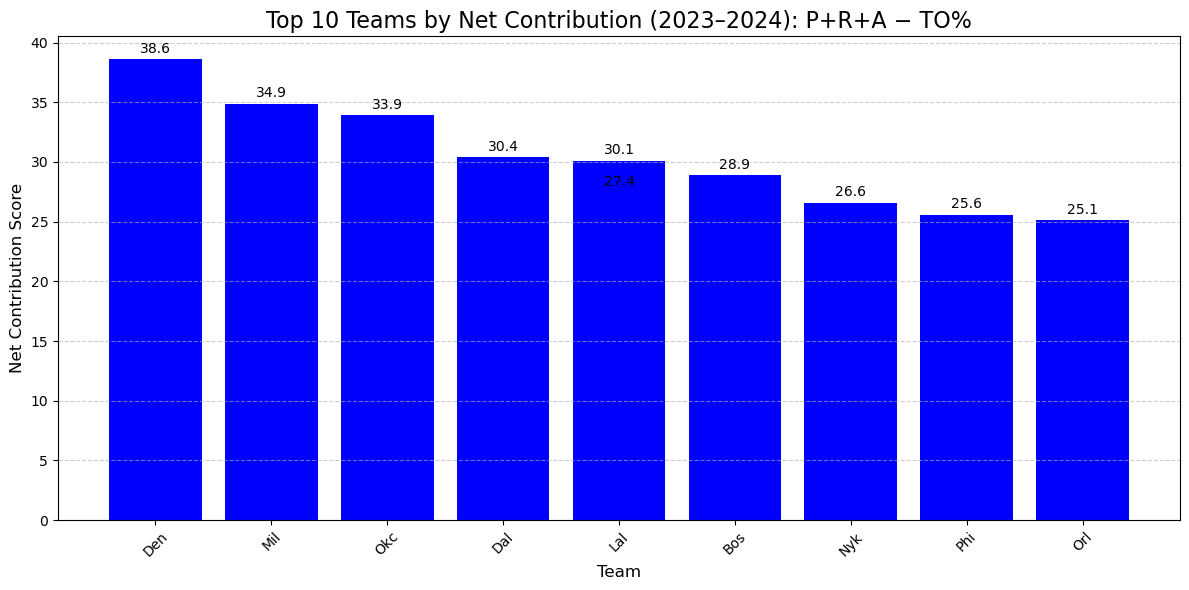

In [199]:
top10_net = nba_23_24_team_avg.sort_values("Net_Contribution", ascending=False).head(10)
top10_net = top10_net.reset_index()  # This brings 'TEAM' back as a column

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top10_net["TEAM"], top10_net["Net_Contribution"], color='blue')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.3, f"{yval:.1f}", ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Teams by Net Contribution (2023–2024): P+R+A − TO%", fontsize=16)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Net Contribution Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

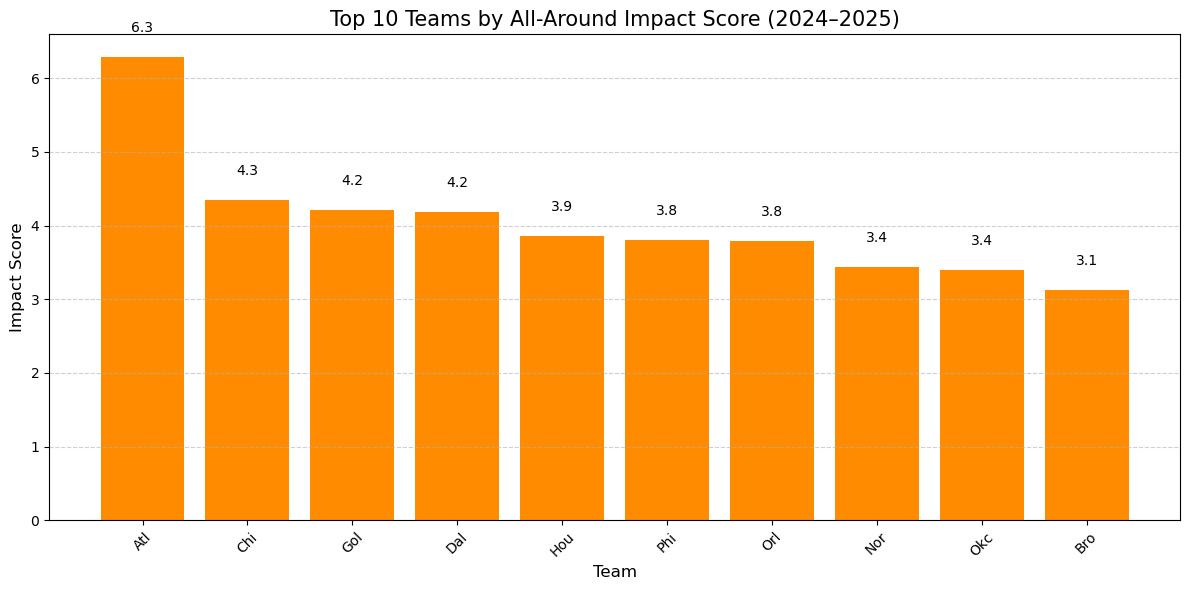

In [207]:
nba_24_25_team_avg["Impact_Score"] = (
    nba_24_25_team_avg["P+R+A"] 
    - nba_24_25_team_avg["TO%"] 
    + nba_24_25_team_avg["SpG"] 
    + nba_24_25_team_avg["BpG"]
)

top10_impact_24_25 = nba_24_25_team_avg.sort_values("Impact_Score", ascending=False).head(10)
top10_impact_24_25 = top10_impact_23_24.reset_index()  

plt.figure(figsize=(12, 6))
bars = plt.bar(top10_impact_24_25["TEAM"], top10_impact_24_25["Impact_Score"], color='darkorange')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.3, f"{yval:.1f}", ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Teams by All-Around Impact Score (2024–2025)", fontsize=15)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Impact Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


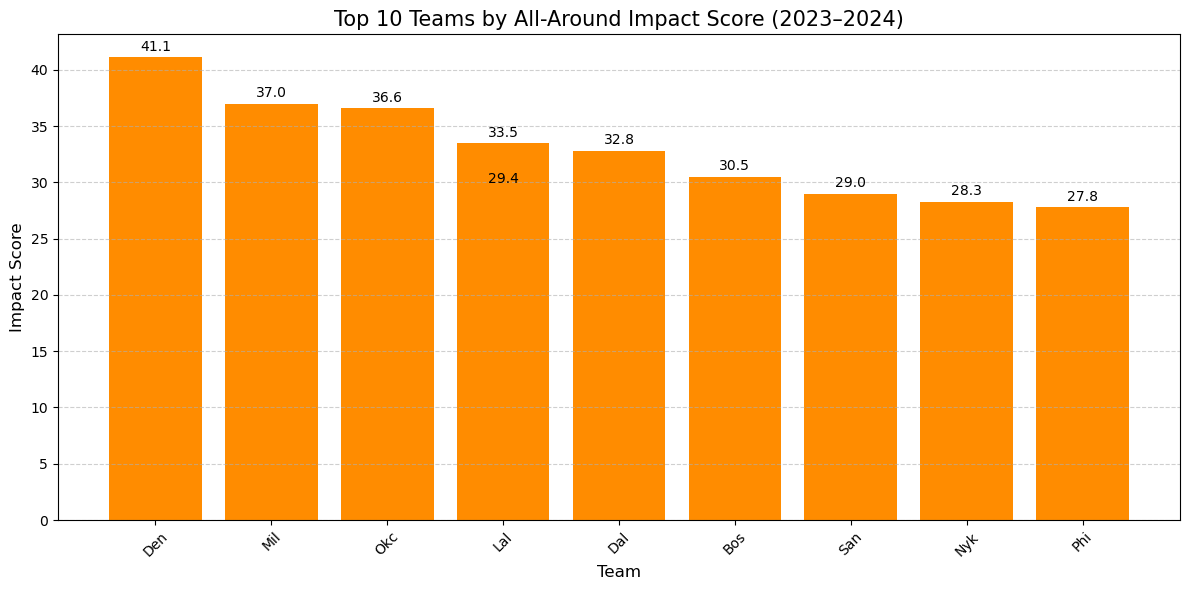

In [203]:
nba_23_24_team_avg["Impact_Score"] = (
    nba_23_24_team_avg["P+R+A"] 
    - nba_23_24_team_avg["TO%"] 
    + nba_23_24_team_avg["SpG"] 
    + nba_23_24_team_avg["BpG"]
)

# Step 2: Get top 10 teams
top10_impact_23_24 = nba_23_24_team_avg.sort_values("Impact_Score", ascending=False).head(10)
top10_impact_23_24 = top10_impact_23_24.reset_index()  # bring TEAM into a column

# Step 3: Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top10_impact_23_24["TEAM"], top10_impact_23_24["Impact_Score"], color='darkorange')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.3, f"{yval:.1f}", ha='center', va='bottom', fontsize=10)

# Final touches
plt.title("Top 10 Teams by All-Around Impact Score (2023–2024)", fontsize=15)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Impact Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
